# Biomedicina: Entrenamiento y clasificacion de datos EEG

In [1]:
import numpy as np
import pandas as pd
from pandas.tools.plotting import radviz
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.manifold import Isomap
import seaborn as sns; sns.set()

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 16, 12

## Preprocesado de datos

In [3]:
s1 = '/home/cramos/Dropbox/BIO/train_subject1_raw01.asc'
s2 = '/home/cramos/Dropbox/BIO/train_subject1_raw02.asc'
s3 = '/home/cramos/Dropbox/BIO/train_subject1_raw03.asc'
t  = '/home/cramos/Dropbox/BIO/test_subject1_raw04.asc'
yr = '/home/cramos/Dropbox/BIO/res_subject1_raw.asc'
etiquetas = ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 
             'CP1', 'CP5', 'P7', 'P3', 'Pz' , 'PO3', 'O1', 'Oz', 
             'O2' , 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 
             'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 
             'Clase']
sub1 = pd.read_fwf(s1, names=etiquetas)
sub2 = pd.read_fwf(s2, names=etiquetas)
sub3 = pd.read_fwf(s3, names=etiquetas)
tst = pd.read_fwf(t, names=etiquetas[:32])
y_r = pd.read_fwf(yr)


Tomamos los 3 datasets de entrenamiento y los concatenamos en un solo dataframe (subs).

In [4]:
frames = [sub1, sub2, sub3]
subs = pd.concat(frames)

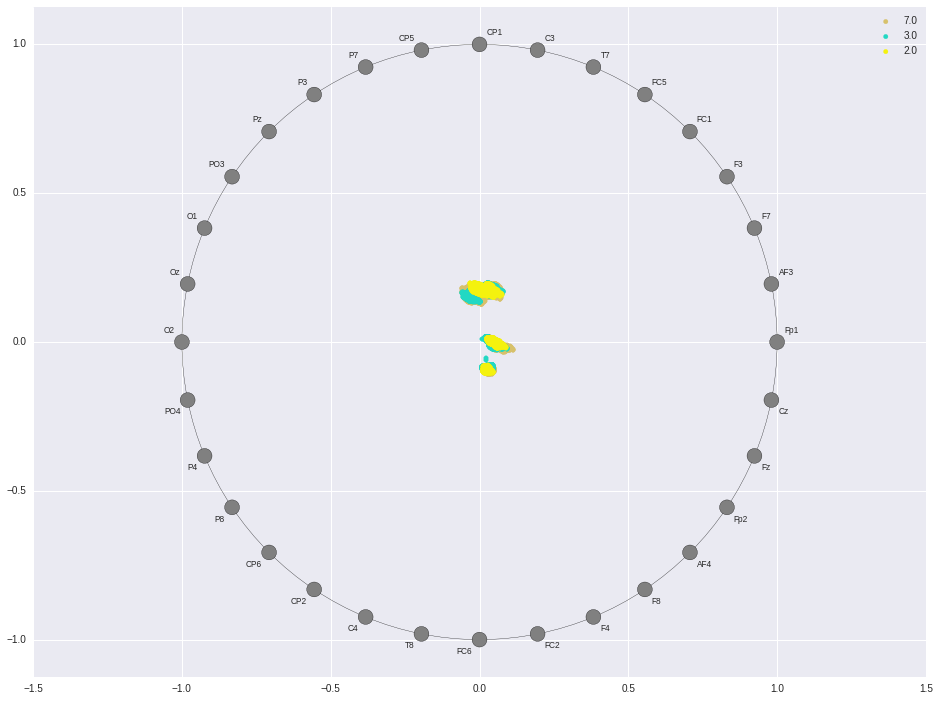

In [5]:
radviz(subs, 'Clase')

### Construcción de matrices de entrenamiento

In [6]:
X = subs.iloc[:,0:32].values
y = subs.iloc[:,32:].values

In [7]:
Xt = tst.iloc[:,0:32].values
y_real = np.matrix(y_r)

In [8]:
y = np.ravel(y)

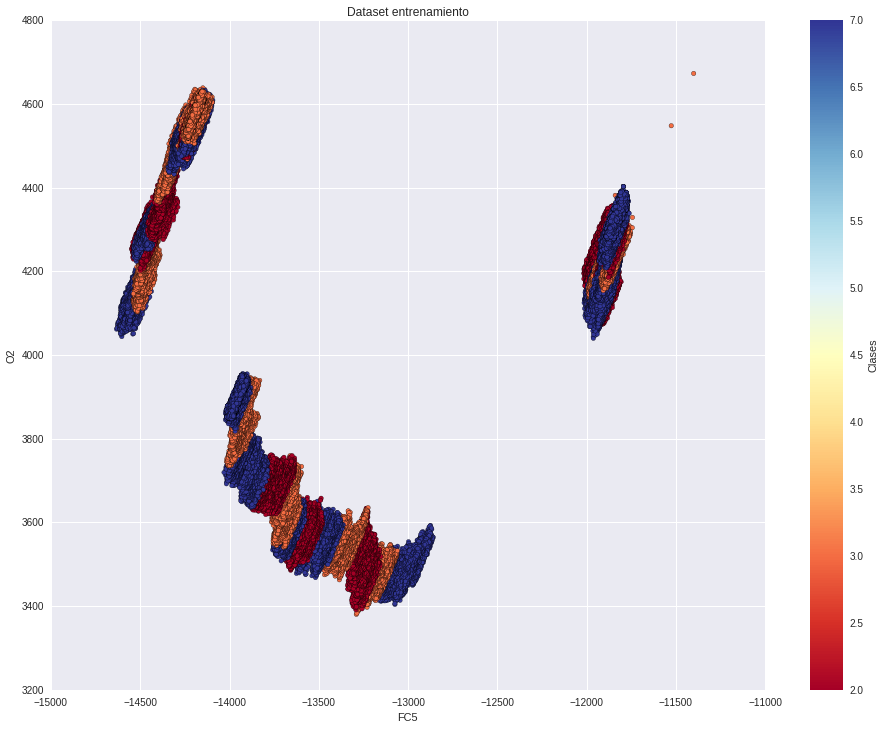

In [9]:
x_ind = 5
y_ind = 16

plt.scatter(X[:,x_ind], X[:,y_ind], c=y, cmap='RdYlBu')
plt.title('Dataset entrenamiento')
plt.ylabel(etiquetas[y_ind]),
plt.xlabel(etiquetas[x_ind])
plt.colorbar(label='Clases')

###  Reducción de características

In [47]:
iso = Isomap(n_neighbors=10, n_components=3)
X_red = iso.fit_transform(X,y)

MemoryError: 

In [ ]:
col_sel = []
for i in X_red[0,:]:
    for j in np.linspace(1, np.size(X[0,:]), np.size(X[0,:])):
        if X[0,:][j-1] == i:
            col_sel.append(j-1)
col_sel

In [ ]:
X[:,col_sel] == X_red

## Entrenamiento

Obtenemos el número de n_neighbors óptimo para el algoritmo KNN. Para ello, primeramente recortamos la matriz de testeo (el vector de resultados reales es sólo de 470x1). Seguidamente, se comprueba mediante score la precisión del algoritmo en función de n_neighbours. Posteriormente plotearemos el vector obtenido, para conocer n_neighbours óptimo sin llegar a overfitting.

In [10]:
Xtt = Xt[1:471][:]

In [38]:
clf_apr, score, s_aux = 0, 0, 0
for i in np.arange(1,1000,1):
    cla = linear_model.SGDClassifier(loss='hinge')
    cla_apr = cla.fit(X, y)
    s_aux = cla_apr.score(Xtt,y_real)
    if  s_aux > score:
        score = s_aux
        clf_apr = cla_apr
print("El mejor clasificador es: ", clf_apr)

El mejor clasificador es:  SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)


In [39]:
score

0.40425531914893614

## Clasificación

In [40]:
#Yt = cla_apr.predict(Xt[:,col_sel])
Yt = clf_apr.predict(Xt)

Después de predecir volvemos a construir el dataframe con los resultados:

In [41]:
Ytm=np.matrix(Yt)

In [42]:
subt = np.concatenate((Xt,Ytm.T), axis=1)

In [43]:
subt = pd.DataFrame(subt, columns=etiquetas)

## Ploteo de resultados

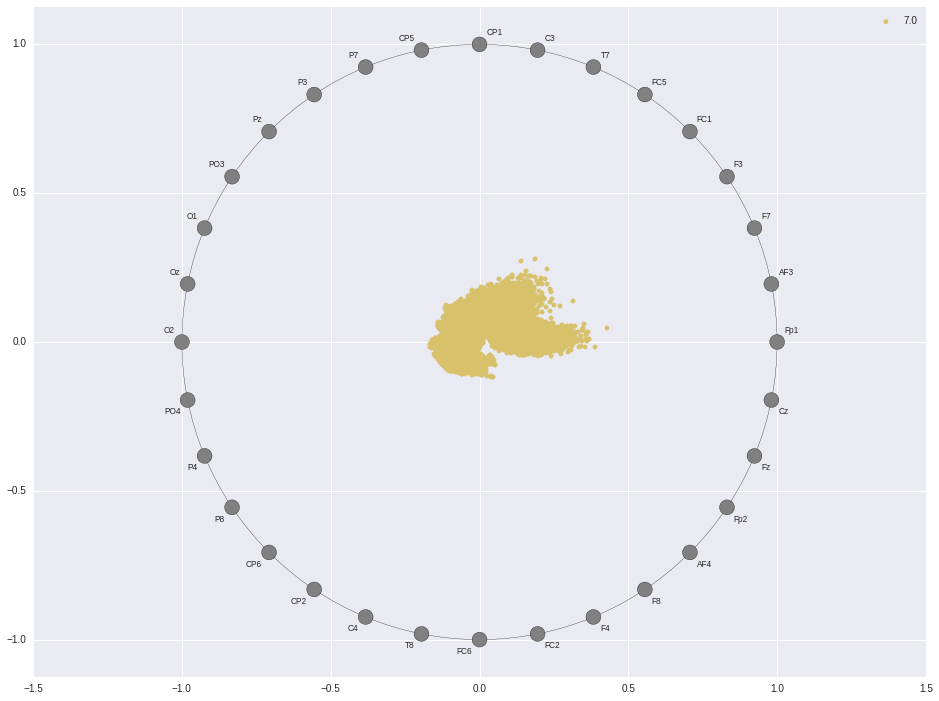

In [44]:
radviz(subt, 'Clase')

In [45]:
Yt_r = np.array(Yt).T[:][:470]

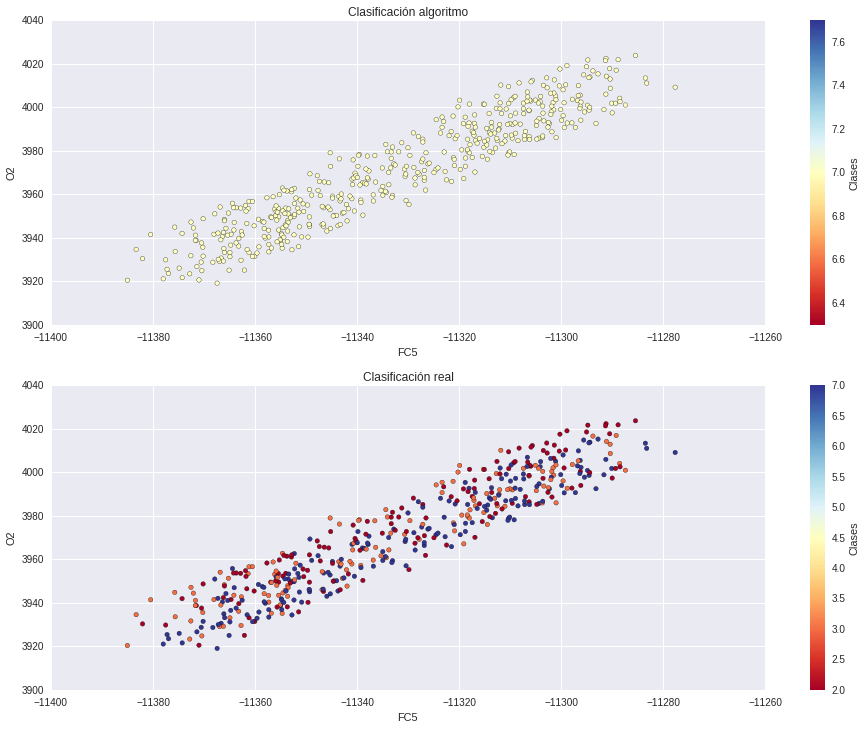

In [46]:
x_ind = 5
y_ind = 16

plt.subplot(2, 1, 1)
plt.scatter(Xtt[:,x_ind], Xtt[:,y_ind], c=np.array(Yt_r), cmap='RdYlBu')
plt.title('Clasificación algoritmo')
plt.ylabel(etiquetas[y_ind]),
plt.xlabel(etiquetas[x_ind])
plt.colorbar(label='Clases')

plt.subplot(2, 1, 2)
plt.scatter(Xtt[:,x_ind], Xtt[:,y_ind], c=np.array(y_real), cmap='RdYlBu')
plt.title('Clasificación real')
plt.ylabel(etiquetas[y_ind]),
plt.xlabel(etiquetas[x_ind])
plt.colorbar(label='Clases',)

plt.show()